## Lab Activity 2
Members:


*   Miguel Glorioso
*   Alexander Pino
*   Dane Rosario
*   Jeremy Tan



## Problem 1

We analyze the situation of re-opening colleges under Covid-19, using a Markov Chain defined over a nine 
element state space. The proposed Markov Chain models a non-recurrent process that moves through a 
number of transient states (1 through 7) eventually leading to one of two absorbing states (8 & 9: Expulsion 
or Coursework Completion) where students remain forever. Absorbing (or recurring) states, like their name 
implies, are states wherein once entered, never leaves; whereas transient states are non-absorbing states. 
Because the state space contains both transient and  absorbing states, instead of a steady state solution 
we  obtain  the  long  run  probabilities  of  Expulsion  or  Completion  the  Course,  when  starting  in  any  of  the 
transient states. Their corresponding expected times are irrelevant here. 
 
Consider a Markov Chain over a nine-element State Space defined as follows: 
 
(1) Arrival to Campus and Covid-19 testing;

(2) Infected students go into Isolation units; 

(3) Some students are placed in face to face courses; 

(4) Other students are placed in online courses; 

(5) Some students who violated Code are placed in 
Suspension; 

(6) Some students become infected with Covid-19, but are not detected; 

(7) Some students violate code but are not detected; 

(8) Absorption: Some students are Expelled from College 

(9) Absorption: Other students Complete their Semester  
 
The Transition Probability Matrix A for this Markov Chain is:



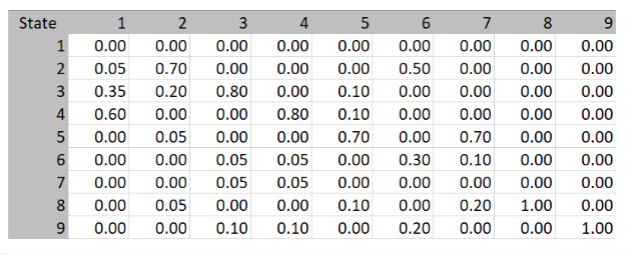

### Objective

Using  any  python  graphing  package  (or  online  diagramming  tool),  visualize  the  state  space 
transition diagram of A. You could either explore other python packages, or use cloud based diagramming 
sites (such as http://www.lucidchart.com or http://app.diagrams.net)  

### Transition Diagram
Link to LucidChart: <br> 
https://lucid.app/lucidchart/d4bd1950-103e-40b6-8d07-7f417ba4086b/edit?invitationId=inv_6cfdd15e-9f1e-4346-a84c-a1704719837b

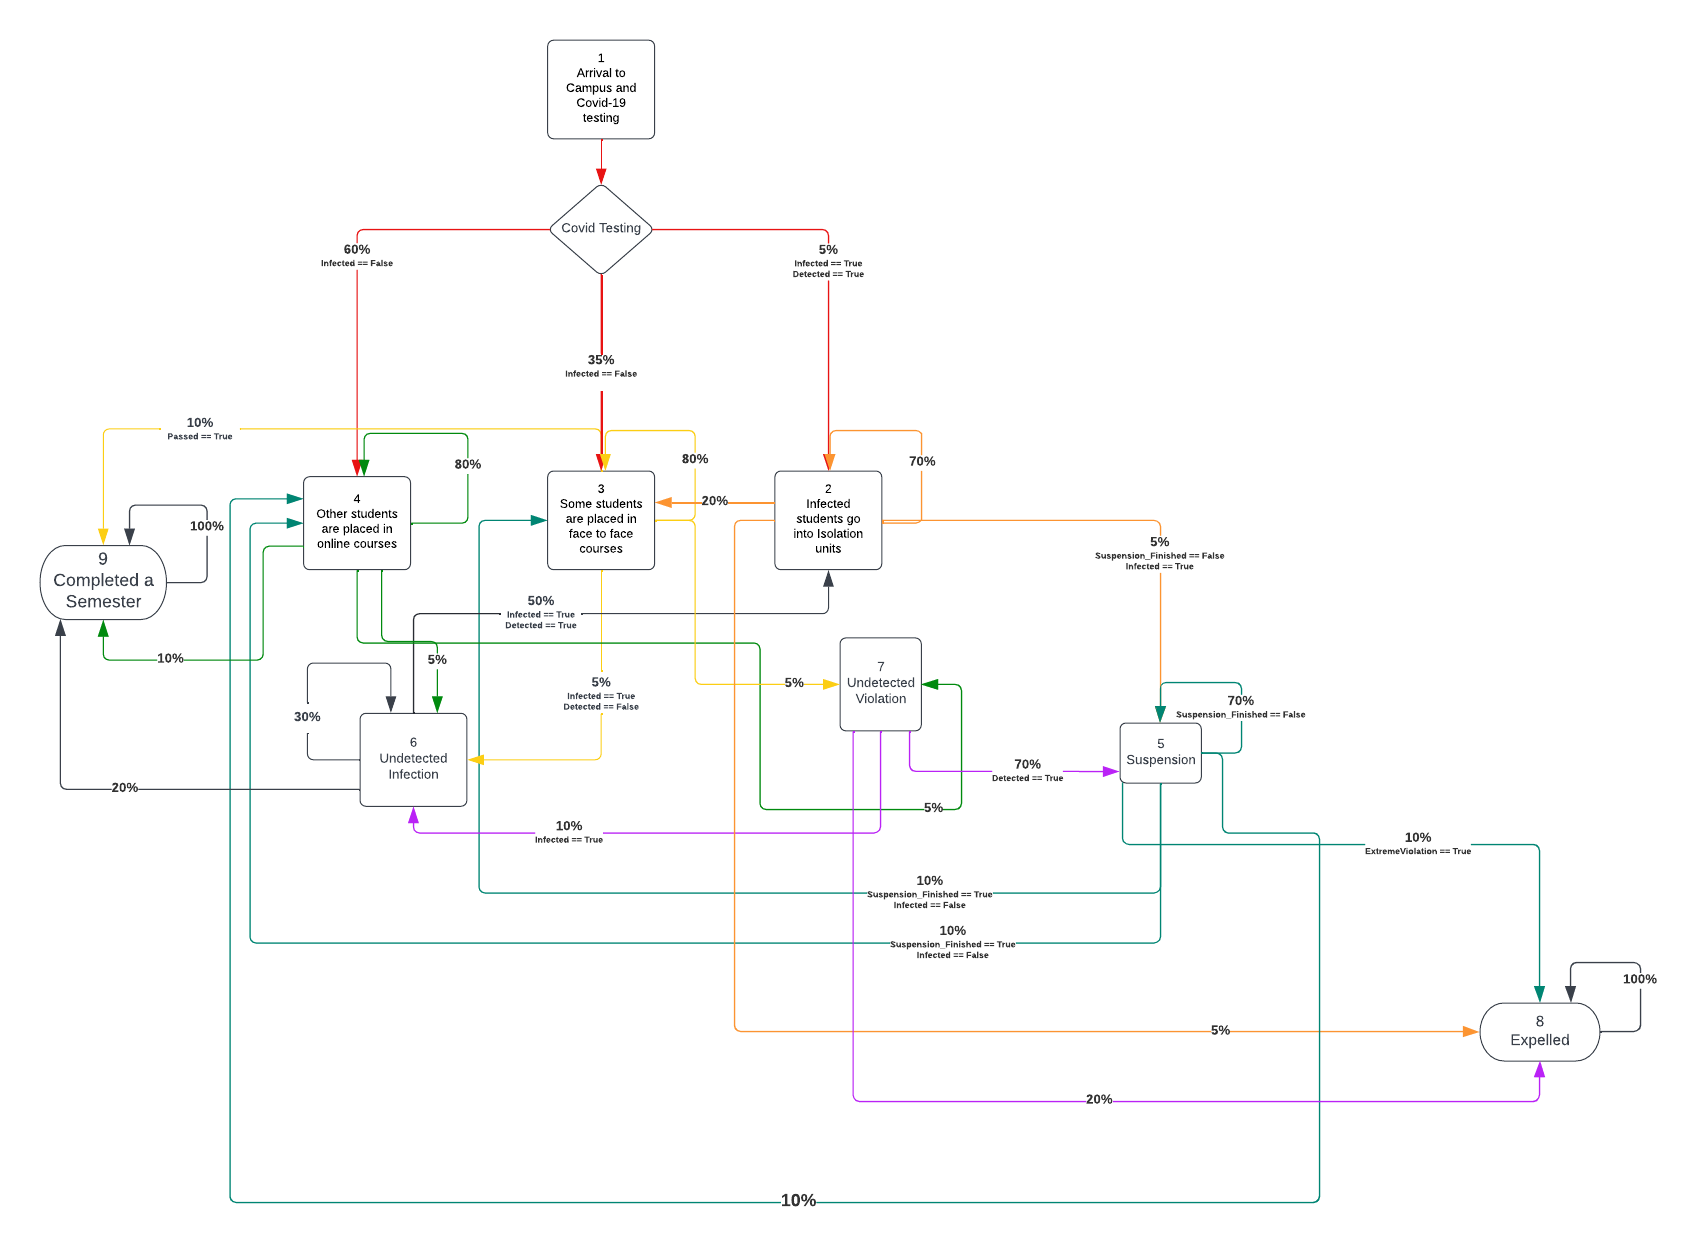

## Problem 2



The Markov Chain unit time is a day. Transitions refer to the State changes that occur from one morning to 
the following morning. Students arrive (1), are tested and distributed into isolation (2) if infected (5%), face 
to face (3), and online courses (4). Some students become infected (6) and are again Isolated (if detected) 
or remain, asymptomatic, until the end of the semester (possibly spreading the disease). Some students 
violate  Code  by  partying,  gathering,  etc.  (7),  and  some  get  caught  and  are  Suspended  (5)  or  become 
infected (6), while others are not detected and return to their courses. Some isolated students break their 
status, are caught and are Suspended (5). Some Code violations are so blatant that students caught are 
Expelled (8), as also are some students that break their Suspension. Students Expelled do not return to 
Campus. All other students finish their semester (9) after completing Isolation, Suspension, and online or 
face  to  face  coursework.  The  transition  rates  and  transitions  between  states  depend  on  environmental 
conditions (e.g. infection rates, social distancing, mask compliance), based on arbitrary values. 



### Objective

Define a MarkovChainLab class whose constructor accepts an n x n transition probability matrix 
A and, optionally, a list of state labels. If A is not column stochastic, raise a ValueError. 
 
Similar  to  the  MarkovChain  class  in  the  module,  construct  a  dictionary  mapping  the  state  labels  to  the 
row/column index that they correspond to in A (given by order of the labels in the list), and save A, the list 
of labels, and this dictionary as attributes. Use the transition probability matrix table above, but EXCLUDE 
ALL the absorption states. 
 
Add the following to the MarkovChainLab class. 
 
 - an attribute S, to represent the inverse matrix of (I- A), that is computed by (I – A) -1, where I is 
the identity matrix. 
 
- get() methods for both attributes. 

### Implementation

In [ ]:
import numpy as np

class MarkovChainLab:
  # Class constructor
  def __init__(self, transitionMatrix, beginAbsorbingStates, stateLabels):
    
    # Exception for non-column-stochastic transition matrix
    for col_sum in np.sum(transitionMatrix, axis=0):
      # Handling floating-point error
      if np.round(col_sum,5) != 1:
        raise ValueError('Matrix is not column-stochastic.') 
    
    # Define state labels attribute
    self.stateLabels = stateLabels

    # Define index mapping attribute
    dimension = len(transitionMatrix)
    self.indexMap = {}
    for i in range(dimension):
      self.indexMap[str(self.stateLabels[i])]=i

    # Define transient matrix and absorbing matrix attribute
    self.transientMatrix = transitionMatrix[:beginAbsorbingStates, :beginAbsorbingStates]
    self.absorbingMatrix = transitionMatrix[beginAbsorbingStates:, :beginAbsorbingStates]
    self.beginAbsorbingStates = beginAbsorbingStates

    # Define limitMatrix attribute for Problem 3 (inverse matrix of I - A)
    self.limitMatrix = np.linalg.inv(np.subtract(np.identity(beginAbsorbingStates), self.transientMatrix))

  # Define get methods
  def get(self, row, column):
      return self.transientMatrix[self.indexMap[row]][self.indexMap[column]]

  def getLM(self, row, column):
      return self.limitMatrix[self.indexMap[row]][self.indexMap[column]]

  # Define method for answering Problem 3
  def getAbsorbingProbability(self):
      return np.multiply(np.round(np.matmul(self.absorbingMatrix, self.limitMatrix),3), 100)
    

reopeningMarkov = MarkovChainLab(
    transitionMatrix = np.array([
      [0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
      [0.05,0.70,0.00,0.00,0.00,0.50,0.00,0.00,0.00],
      [0.35,0.20,0.80,0.00,0.10,0.00,0.00,0.00,0.00],
      [0.60,0.00,0.00,0.80,0.10,0.00,0.00,0.00,0.00],
      [0.00,0.05,0.00,0.00,0.70,0.00,0.70,0.00,0.00],
      [0.00,0.00,0.05,0.05,0.00,0.30,0.10,0.00,0.00],
      [0.00,0.00,0.05,0.05,0.00,0.00,0.00,0.00,0.00],
      [0.00,0.05,0.00,0.00,0.10,0.00,0.20,1.00,0.00],
      [0.00,0.00,0.10,0.10,0.00,0.20,0.00,0.00,1.00]
    ]),
    beginAbsorbingStates = 7,
    stateLabels = np.array([
      'Arrival', 
      'Detected Infection',
      'Face to Face Courses',
      'Online Courses',
      'Suspension',
      'Undetected Infection',
      'Undetected Violation',
      'Person is expelled',
      'Person completes semester'
    ])
    )



In [ ]:
reopeningMarkov.transientMatrix

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.05, 0.7 , 0.  , 0.  , 0.  , 0.5 , 0.  ],
       [0.35, 0.2 , 0.8 , 0.  , 0.1 , 0.  , 0.  ],
       [0.6 , 0.  , 0.  , 0.8 , 0.1 , 0.  , 0.  ],
       [0.  , 0.05, 0.  , 0.  , 0.7 , 0.  , 0.7 ],
       [0.  , 0.  , 0.05, 0.05, 0.  , 0.3 , 0.1 ],
       [0.  , 0.  , 0.05, 0.05, 0.  , 0.  , 0.  ]])

In [ ]:
reopeningMarkov.absorbingMatrix

array([[0.  , 0.05, 0.  , 0.  , 0.1 , 0.  , 0.2 ],
       [0.  , 0.  , 0.1 , 0.1 , 0.  , 0.2 , 0.  ]])

In [ ]:
reopeningMarkov.indexMap

{'Arrival': 0,
 'Detected Infection': 1,
 'Face to Face Courses': 2,
 'Online Courses': 3,
 'Person completes semester': 8,
 'Person is expelled': 7,
 'Suspension': 4,
 'Undetected Infection': 5,
 'Undetected Violation': 6}

In [ ]:
reopeningMarkov.limitMatrix

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.05296035, 4.03041825, 0.89625204, 0.89625204, 0.59750136,
        2.87887018, 0.70613797],
       [3.28551059, 4.67680608, 6.37017925, 1.37017925, 2.5801195 ,
        3.34057577, 2.14014123],
       [3.48255024, 0.64638783, 0.47392721, 5.47392721, 1.98261814,
        0.46170559, 1.43400326],
       [0.96510049, 1.29277567, 0.94785443, 0.94785443, 3.96523628,
        0.92341119, 2.86800652],
       [0.53177621, 0.41825095, 0.53775122, 0.53775122, 0.35850081,
        1.72732211, 0.42368278],
       [0.33840304, 0.2661597 , 0.34220532, 0.34220532, 0.22813688,
        0.19011407, 1.17870722]])

In [ ]:
reopeningMarkov.get('Arrival', 'Online Courses')

0.0

In [ ]:
reopeningMarkov.getLM('Arrival','Online Courses')

0.0

## Problem 3

We calculate the probabilities of Expulsion and Coursework Completion, starting from any of the transient 
states. We calculate these probabilities using Matrix B, a sub-matrix of all transient states. B is constructed 
by taking the rows and columns of A, corresponding to the two Absorbing states (last two states). 
 

### Objective

Problem 3. Using the S attribute from the MarkovChainLab class, multiplied with matrix B indicated from 
the paragraph above, calculate and display a new matrix G. 
 
Such  Matrix  G,  yields  the  probability  of  ever  reaching  absorbing  states  of  Expulsion,  or  Coursework 
Completion, starting from any given transient state. 

### Implementation

In [ ]:
import pandas as pd

dfG = pd.DataFrame(data = reopeningMarkov.getAbsorbingProbability(), 
      columns = reopeningMarkov.stateLabels[:reopeningMarkov.beginAbsorbingStates],
      index = reopeningMarkov.stateLabels[reopeningMarkov.beginAbsorbingStates:]
      )

dfG

,Arrival,Detected Infection,Face to Face Courses,Online Courses,Suspension,Undetected Infection,Undetected Violation
Person is expelled,21.7,38.4,20.8,20.8,47.2,27.4,55.8
Person completes semester,78.3,61.6,79.2,79.2,52.8,72.6,44.2


## Problem 4

This Markov model, due to its specific State Spaces and its transition probabilities is particularly useful to 
assess the effectiveness of reopening plans. 

### Objective

If you were the dean / head of this Campus, what is your recommendation for the reopening of 
the school? Justify your answer by analyzing and providing insights from the simulation results. 

### Answer

After reviewing the findings of the Markov Chain we made, we recommend a  gradual shift to face to face classes in Ateneo de Manila University. The results we acquired reveal an extraordinarily high expulsion rate among students who have gone to face to face set-up at over 20%. There is a staggering amount of students that are getting expelled due to violating Covid-19 protocols such as not wearing masks, loitering around campus. Therefore, we suggest that we instill proper discipline among the students in this new phase of the pandemic to lessen the percentage of students getting infected or expelled. There is a significant increase of around 18% in the number of expulsions among infected students compared to healthy students. 

The rate at which students with F2F classes are getting expelled is about 20 percent which translates to about 2000 students per semester assuming that the entire student population of 10,000 is undergoing F2F classes. It is also worth mentioning that the online classes set-up has the same rate of expulsion as the face to face making it questionable. 


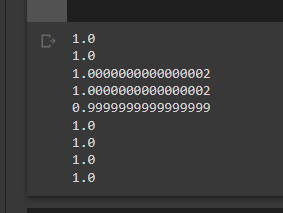

Reference:
https://www.math.umd.edu/~immortal/MATH401/book/ch_absorbing_markov_chains.pdf